<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_an%C3%A1lises_Sales_FacebookProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise sobre Vendas usando Machine Learning aplicando o algoritimo com Facebook PROPHET**

Bibliotecas

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

Dados das vendas

In [4]:
base_sales = pd.read_csv('/content/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
base_sales.shape

(1017209, 9)

In [7]:
base_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
base_sales['DayOfWeek'].unique() #1 a 7, seg a dom

array([5, 4, 3, 2, 1, 7, 6])

In [11]:
base_sales['Open'].unique() # 1 ou 0, ou a loja ta aberta ou fechada

array([1, 0])

In [12]:
base_sales['Promo'].unique()

array([1, 0])

In [14]:
base_sales['StateHoliday'].unique() #tipos de feriados representados por letra: (a)feriado publico (c)natal, (b)pascoa

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [15]:
base_sales['SchoolHoliday'].unique()

array([1, 0])

In [16]:
base_sales.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [17]:
base_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [18]:
base_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


25% = 1 quartil, 50% = 2 quartil, 75% = 3 quartil

Dados das lojas

In [19]:
base_store = pd.read_csv('/content/store.csv')

In [20]:
base_store.shape

(1115, 10)

In [21]:
base_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [22]:
base_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [24]:
base_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


**Exploração dos Dados**

Base das Vendas

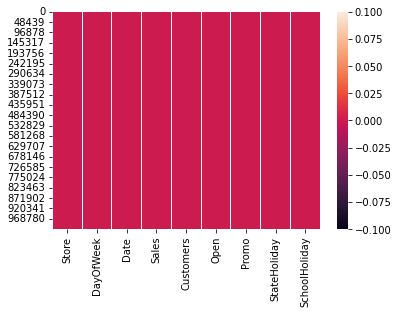

In [27]:
sns.heatmap(base_sales.isnull());

nenhuma barra no grupo, então não há valores faltantes, podemos confirmar abaixo:

In [28]:
base_sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

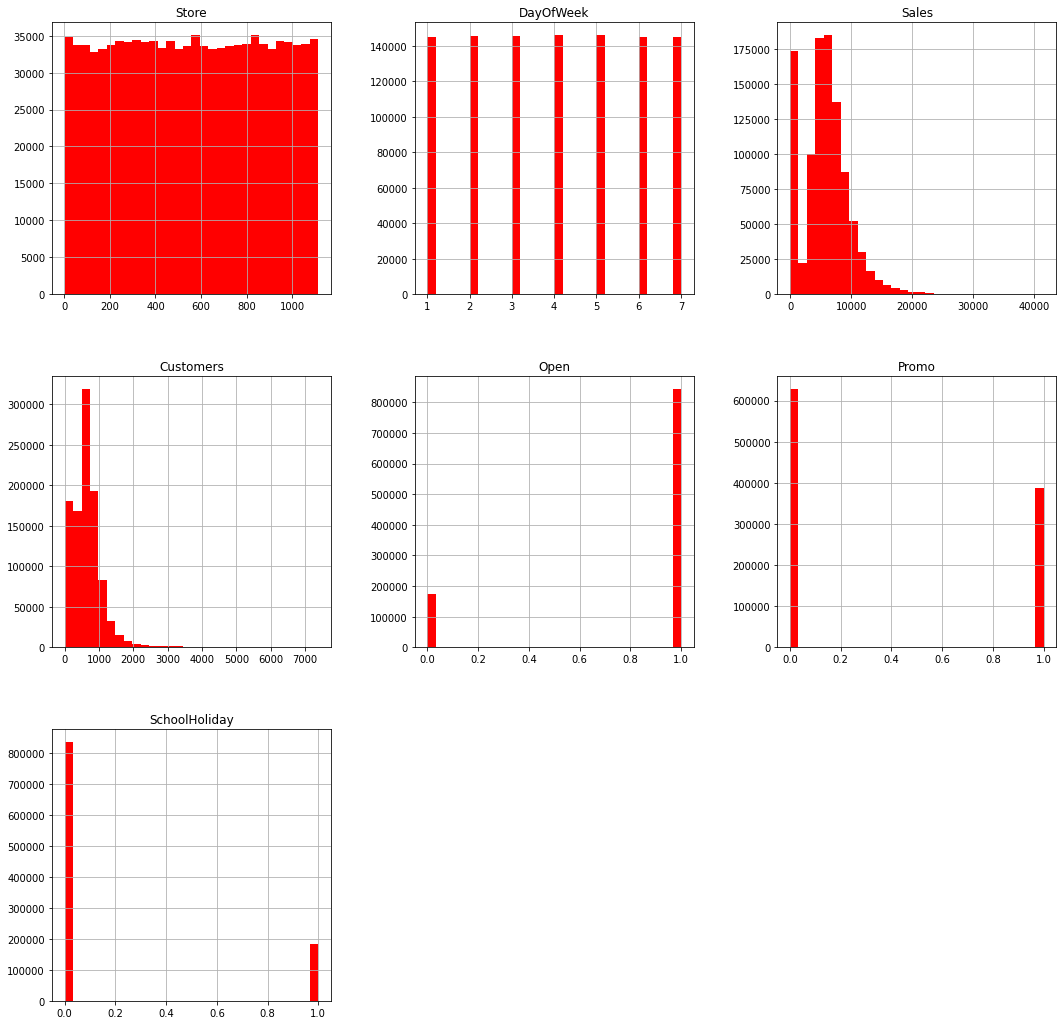

In [33]:
base_sales.hist(bins = 30, figsize=(18,18), color= 'r'); #histograma

In [34]:
base_sales['Customers'].max()

7388

7388 clientes em um unico dia

In [35]:
closed_sales = base_sales[base_sales['Open']==0]
opened_sales =  base_sales[base_sales['Open']==1]

In [36]:
print('Total =',len(base_sales))
print('numero de lojas/dias fechados', len(closed_sales))
print('numero de lojas/dias abertas', len(opened_sales))

Total = 1017209
numero de lojas/dias fechados 172817
numero de lojas/dias abertas 844392


In [37]:
closed_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [38]:
opened_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [39]:
base_sales.drop(['Open'], axis=1, inplace=True)

In [40]:
base_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [41]:
base_sales.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00


os valores de vendas e clientes aumentaram devido a essa alteração, pois apagando a coluna 'Open', os dias que as lojas estavam fechadas prejudicavam os valores das vendas em média

Base das Lojas

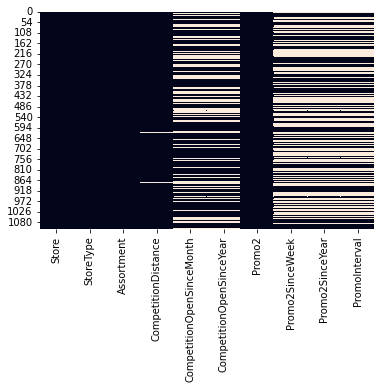

In [45]:
sns.heatmap(base_store.isnull(), cbar=False);

In [44]:
base_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

portanto neste dataset há valores faltantes

In [47]:
base_store[base_store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [49]:
base_store[base_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [50]:
base_store[base_store['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [53]:
base_store[base_store['Promo2'] == 0] # lojas que nao estao particpando da promoção

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


em torno da metade das lojas não participam dessa promoção, então nao faz sentido preencher os valores faltantes dessas lojas

In [54]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear','CompetitionOpenSinceMonth']

for str in str_cols:
  base_store[str].fillna(0, inplace = True)

aqui substituimos nessas colunas, NaN por zero

In [56]:
base_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

agora só falta arrumar os 3 registros Nulos do CompetetionDistance

In [57]:
base_store['CompetitionDistance'].fillna(base_store['CompetitionDistance'].mean(), inplace = True)

substituimos esses valoresfaltantes pela média

In [58]:
base_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

pronto, sem valores faltantes

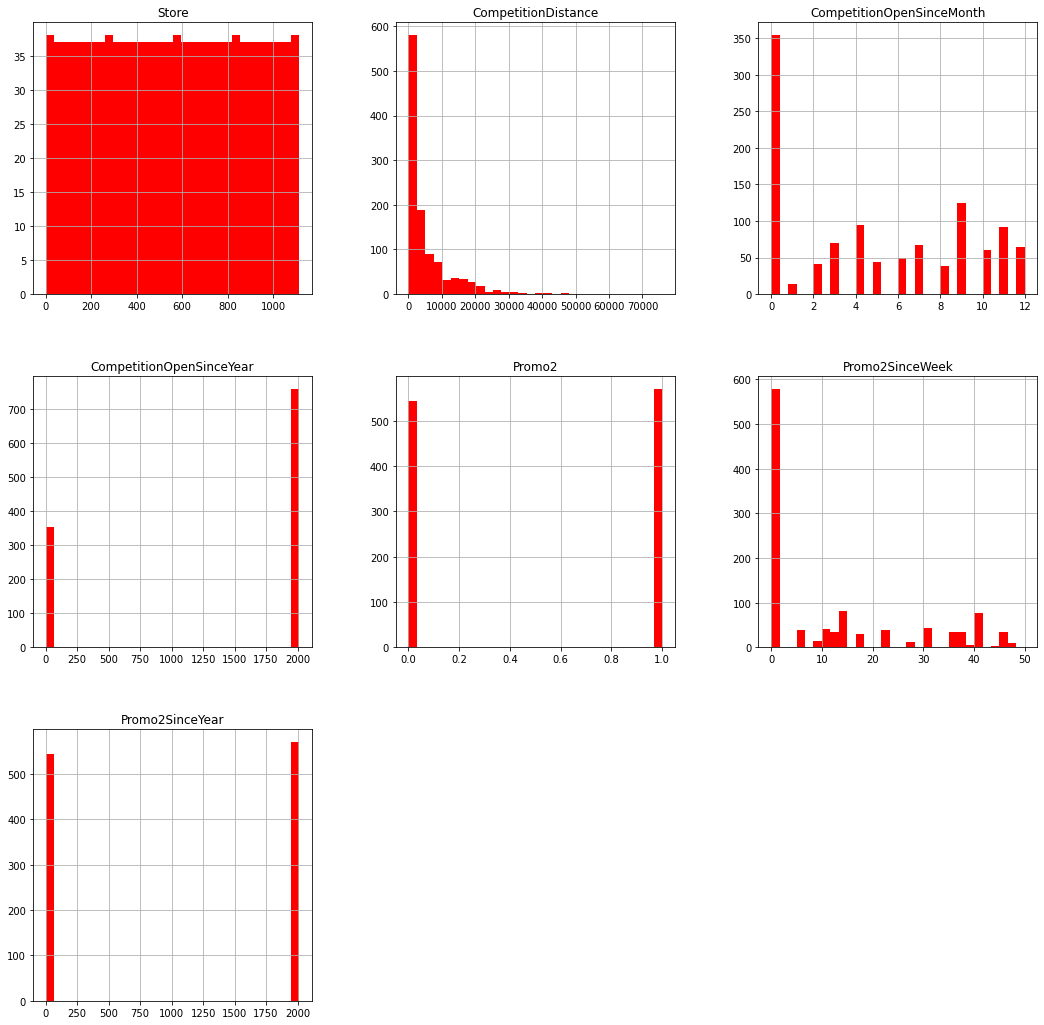

In [59]:
base_store.hist(bins =30, figsize=(18,18), color='r');

Juntando os dados agora:

In [60]:
base_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [61]:
base_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [62]:
base_sales_all = pd.merge(base_sales, base_store, how='inner', on='Store')

In [63]:
base_sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [64]:
base_sales_all.shape

(1017209, 17)

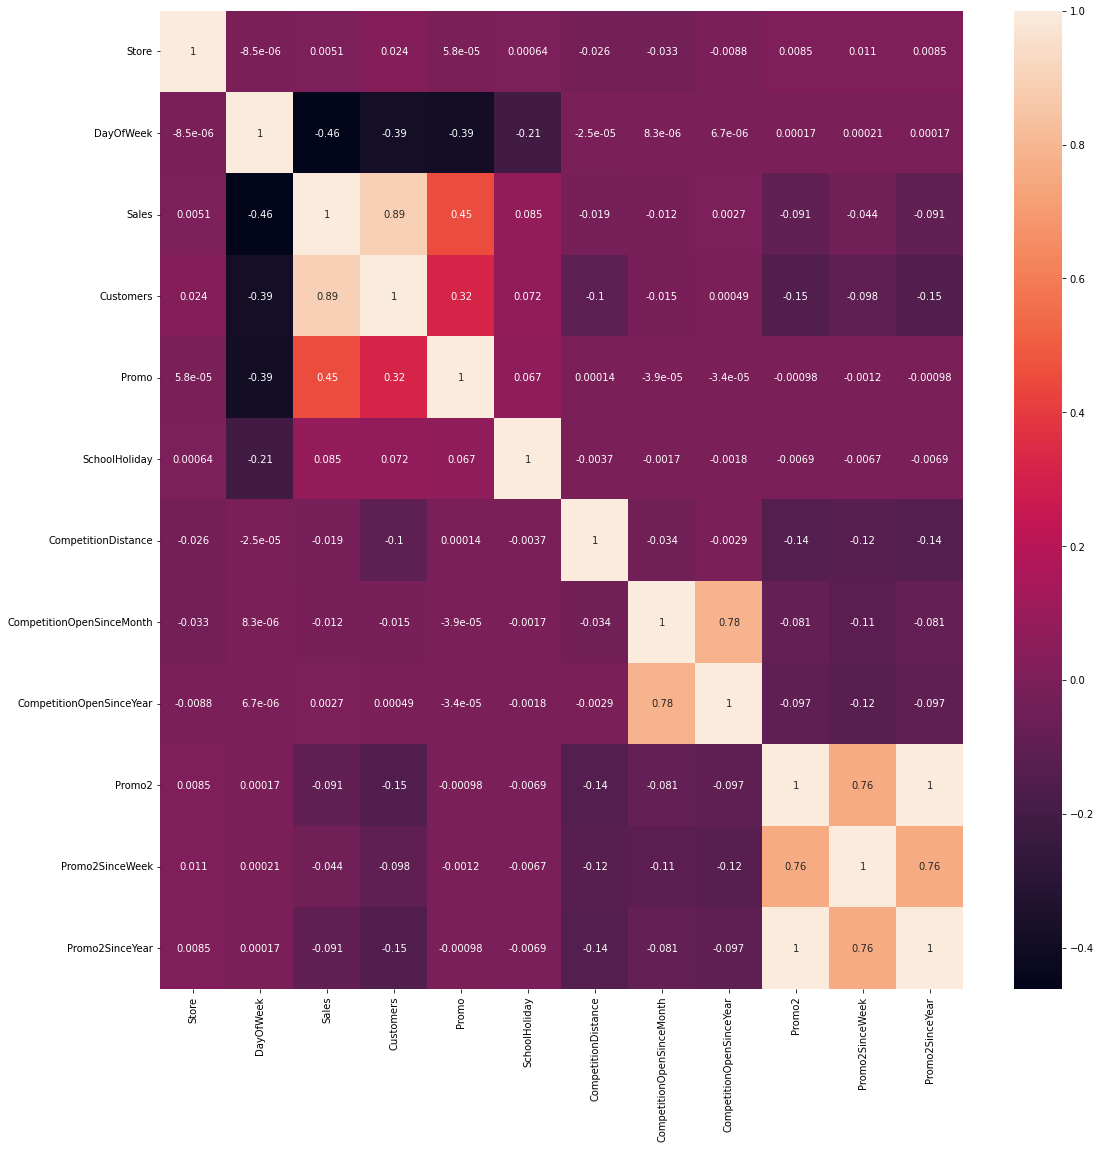

In [66]:
correlations = base_sales_all.corr()
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(correlations, annot=True);

In [68]:
correlations = base_sales_all.corr()['Sales'].sort_values()
correlations #relação das vendas com outros atributos

DayOfWeek                   -0.462125
Promo2SinceYear             -0.091056
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
CompetitionDistance         -0.019207
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Store                        0.005126
SchoolHoliday                0.085124
Promo                        0.452345
Customers                    0.894711
Sales                        1.000000
Name: Sales, dtype: float64

In [78]:
#novo atributo para separar valores dentro de uma coluna, add um item em uma nova coluna
base_sales_all['Year'] = pd.DatetimeIndex(base_sales_all['Date']).year #separamos uma coluna para o ano
base_sales_all['Month'] = pd.DatetimeIndex(base_sales_all['Date']).month # aqui para o mes
base_sales_all['Day'] = pd.DatetimeIndex(base_sales_all['Date']).day

In [80]:
base_sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Media de Vendas por mês')

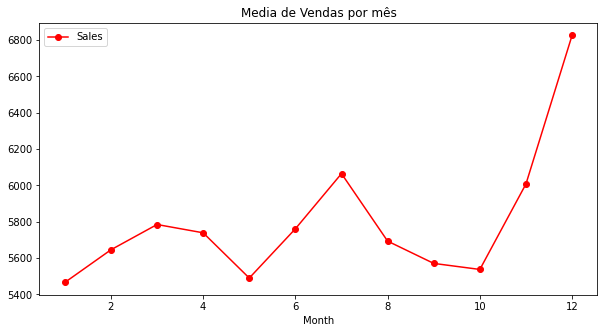

In [86]:
axis = base_sales_all.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='r');
axis.set_title('Media de Vendas por mês')

vemos o comportamento ds vendas por mês, onde notamos um aumento grande a partir de novembro e ainda maior em dezembro, periodo do ano onde as pessoas tendem a comprar mais

Text(0.5, 1.0, 'Media de clientes por mês')

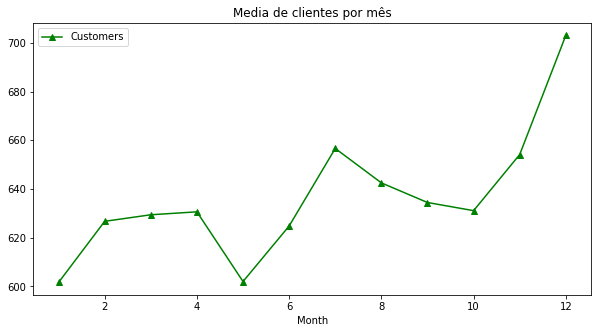

In [88]:
axis = base_sales_all.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker='^', color='g');
axis.set_title('Media de clientes por mês')

aqui o mesmo gráfico mas considerando os clientes no lugar das vendas, mas é claro que um tem a ver com o outro, por isso, são graficos parecidos

Text(0.5, 1.0, 'Media de Vendas por dias')

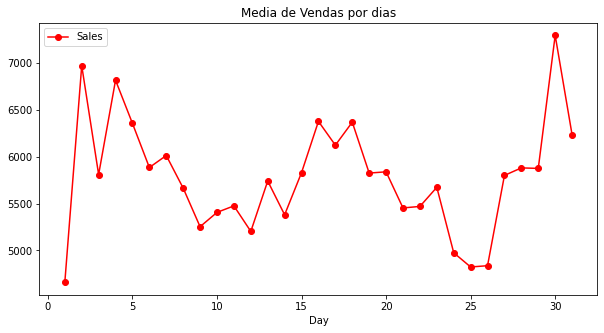

In [89]:
axis = base_sales_all.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='r');
axis.set_title('Media de Vendas por dias')

aqui temos o gráfico da média de vendas por dia

Text(0.5, 1.0, 'Media de Vendas por dias')

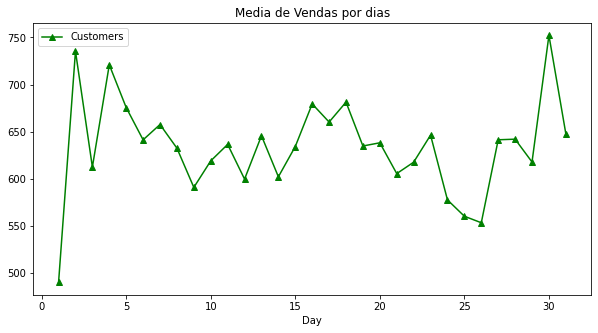

In [90]:
axis = base_sales_all.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker='^', color='g');
axis.set_title('Media de Vendas por dias')

novamente um gráfico com o mesmo aspecto que o anterior, como, claro, clientes e vendas andam juntos

Text(0.5, 1.0, 'Media de Vendas por dia da semana')

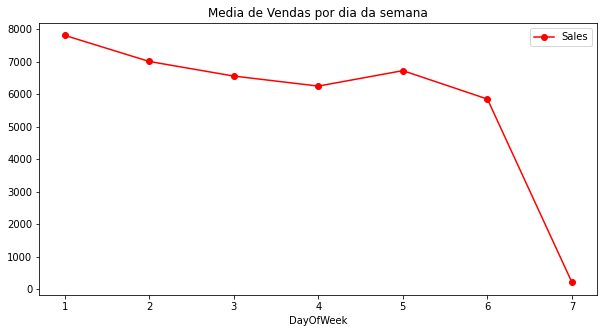

In [92]:
axis = base_sales_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='r');
axis.set_title('Media de Vendas por dia da semana')

aqui vemos que começam muito bem no inicio da semana(segunda) e depois de sabado caem bastante, isso claro pois a maioria das lojas não abrem no domingo

Text(0.5, 1.0, 'Media de Vendas por dia da semana')

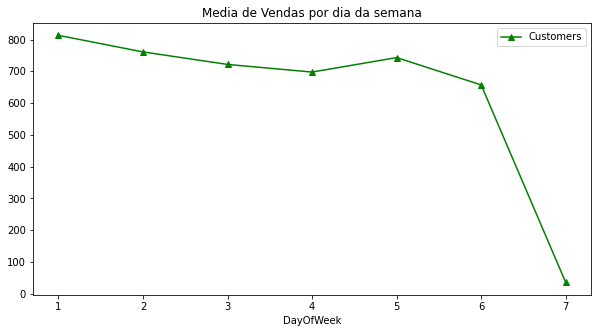

In [93]:
axis = base_sales_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker='^', color='g');
axis.set_title('Media de Vendas por dia da semana')

o mesmo comportamento que o gráfico anterior

**Treinando o Modelo para fazer previsões**

In [96]:
from fbprophet import Prophet

vamos precisar renomear:

Date -- ds e 
Sales --y

In [103]:
def sales_predictions(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  modelo = Prophet()
  modelo.fit(sales_df)
  futuro = modelo.make_future_dataframe(periods=periods)
  previsão = modelo.predict(futuro)
  figura = modelo.plot(previsão, xlabel='Data', ylabel='Sales')
  figura2 = modelo.plot_components(previsão)

  return sales_df, previsão

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


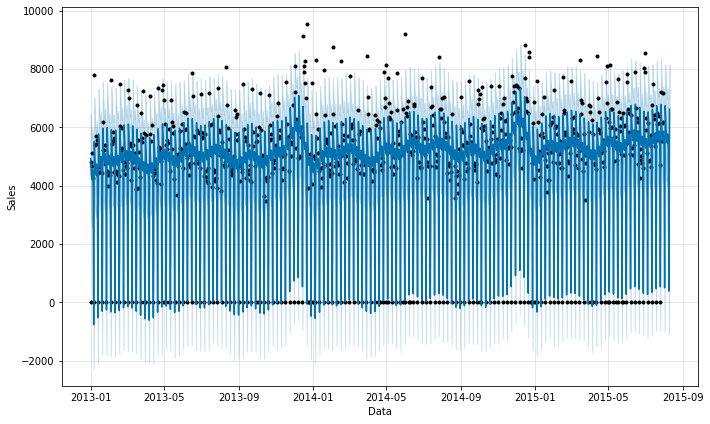

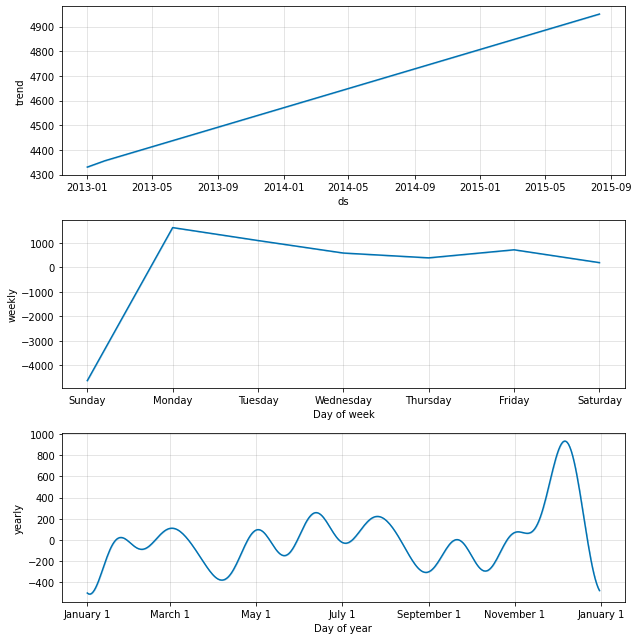

In [105]:
df_original, df_previsao = sales_predictions(10, base_sales_all, 10);

*os pontos pretos no 1 gráfico sao os dados anteriores e fora deles ja sao as previsoes feitas pelo algoritimo fbProphet; gráfico trend x ds é a TENDENCIA de vendas; e os outros dois ultimos gráficos mostram o comportamento dos dias da semana e do ano respectivamente.*

In [106]:
df_original.shape

(942, 2)

In [107]:
df_previsao.shape

(952, 19)

previsao aumentou 10 do original pois foi o numero que incluimos nos graficos:10

In [108]:
df_previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,4330.465276,3478.505388,6453.280871,4330.465276,4330.465276,598.651188,598.651188,598.651188,1101.082105,1101.082105,1101.082105,-502.430917,-502.430917,-502.430917,0.0,0.0,0.0,4929.116464
1,2013-01-02,4331.265370,2819.419742,6025.992363,4331.265370,4331.265370,77.342438,77.342438,77.342438,589.100393,589.100393,589.100393,-511.757955,-511.757955,-511.757955,0.0,0.0,0.0,4408.607808
2,2013-01-03,4332.065463,2584.002958,5604.631561,4332.065463,4332.065463,-120.819683,-120.819683,-120.819683,392.345869,392.345869,392.345869,-513.165553,-513.165553,-513.165553,0.0,0.0,0.0,4211.245780
3,2013-01-04,4332.865557,2979.216660,5990.468236,4332.865557,4332.865557,214.868600,214.868600,214.868600,721.964023,721.964023,721.964023,-507.095424,-507.095424,-507.095424,0.0,0.0,0.0,4547.734156
4,2013-01-05,4333.665650,2567.238911,5460.416056,4333.665650,4333.665650,-296.994579,-296.994579,-296.994579,197.119711,197.119711,197.119711,-494.114290,-494.114290,-494.114290,0.0,0.0,0.0,4036.671072


In [109]:
df_previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
947,2015-08-06,4948.082662,4030.457127,6992.263203,4948.082662,4948.082662,515.596776,515.596776,515.596776,392.345869,392.345869,392.345869,123.250906,123.250906,123.250906,0.0,0.0,0.0,5463.679437
948,2015-08-07,4948.730006,4321.802855,7340.531238,4948.730006,4948.730006,826.983599,826.983599,826.983599,721.964023,721.964023,721.964023,105.019576,105.019576,105.019576,0.0,0.0,0.0,5775.713605
949,2015-08-08,4949.377351,3649.057145,6739.584418,4949.377295,4949.378868,282.812904,282.812904,282.812904,197.119711,197.119711,197.119711,85.693193,85.693193,85.693193,0.0,0.0,0.0,5232.190254
950,2015-08-09,4950.024695,-1092.748560,1919.837487,4950.023320,4950.029558,-4566.695687,-4566.695687,-4566.695687,-4632.081673,-4632.081673,-4632.081673,65.385986,65.385986,65.385986,0.0,0.0,0.0,383.329008
951,2015-08-10,4950.672040,5123.669329,8165.965659,4950.669051,4950.679484,1674.685094,1674.685094,1674.685094,1630.469571,1630.469571,1630.469571,44.215523,44.215523,44.215523,0.0,0.0,0.0,6625.357134


In [110]:
df_original.head()

,ds,y
9419,2013-01-01,0
9418,2013-01-02,4812
9417,2013-01-03,4675
9416,2013-01-04,5114
9415,2013-01-05,4256


In [111]:
df_original.tail()

,ds,y
8482,2015-07-27,7212
8481,2015-07-28,6140
8480,2015-07-29,5524
8479,2015-07-30,6186
8478,2015-07-31,7185


agora vamos mudar para 60, e vamos ver como ficam os gráficos

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


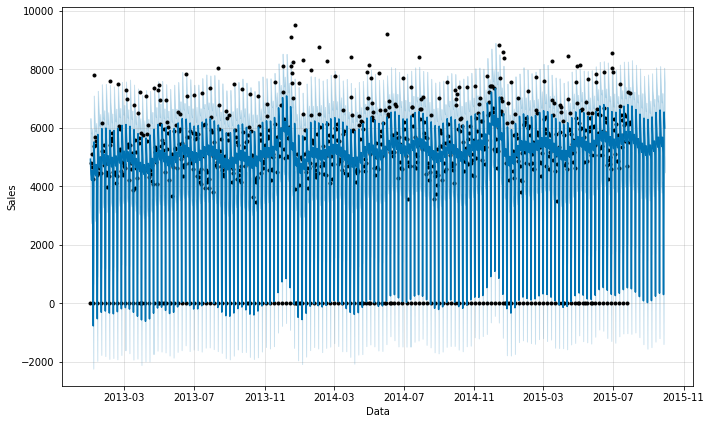

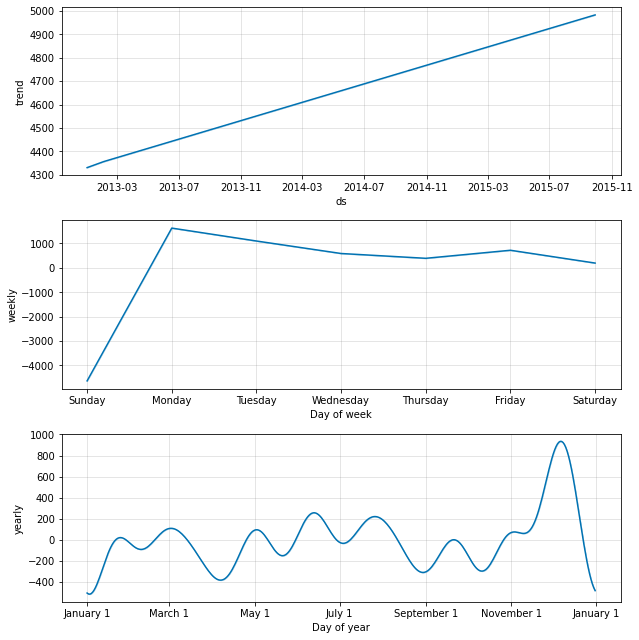

In [112]:
df_original, df_previsao = sales_predictions(10, base_sales_all, 60);

In [114]:
df_previsao.tail(60) # os ultimos 60 registros

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
942,2015-08-01,4944.845939,3872.566144,6934.601205,4944.845939,4944.845939,391.244476,391.244476,391.244476,197.119711,197.119711,197.119711,194.124765,194.124765,194.124765,0.0,0.0,0.0,5336.090415
943,2015-08-02,4945.493283,-1042.518648,1967.979677,4945.493283,4945.493283,-4449.069330,-4449.069330,-4449.069330,-4632.081673,-4632.081673,-4632.081673,183.012342,183.012342,183.012342,0.0,0.0,0.0,496.423953
944,2015-08-03,4946.140628,5176.864471,8309.421206,4946.140628,4946.140628,1800.733229,1800.733229,1800.733229,1630.469571,1630.469571,1630.469571,170.263658,170.263658,170.263658,0.0,0.0,0.0,6746.873857
945,2015-08-04,4946.787972,4535.950328,7672.619273,4946.787972,4946.787972,1257.064508,1257.064508,1257.064508,1101.082105,1101.082105,1101.082105,155.982403,155.982403,155.982403,0.0,0.0,0.0,6203.852480
946,2015-08-05,4947.435317,4119.564888,7170.966418,4947.435317,4947.435317,729.375655,729.375655,729.375655,589.100393,589.100393,589.100393,140.275261,140.275261,140.275261,0.0,0.0,0.0,5676.810972
947,2015-08-06,4948.082662,3886.083099,6978.934294,4948.082662,4948.082662,515.596776,515.596776,515.596776,392.345869,392.345869,392.345869,123.250906,123.250906,123.250906,0.0,0.0,0.0,5463.679437
948,2015-08-07,4948.730006,4264.270310,7233.184254,4948.730006,4948.730006,826.983599,826.983599,826.983599,721.964023,721.964023,721.964023,105.019576,105.019576,105.019576,0.0,0.0,0.0,5775.713605
949,2015-08-08,4949.377351,3711.381034,6802.853384,4949.377351,4949.378355,282.812904,282.812904,282.812904,197.119711,197.119711,197.119711,85.693193,85.693193,85.693193,0.0,0.0,0.0,5232.190254
950,2015-08-09,4950.024695,-995.452113,1907.115616,4950.024695,4950.028122,-4566.695687,-4566.695687,-4566.695687,-4632.081673,-4632.081673,-4632.081673,65.385986,65.385986,65.385986,0.0,0.0,0.0,383.329008
951,2015-08-10,4950.672040,5065.607607,8155.175502,4950.671326,4950.677538,1674.685094,1674.685094,1674.685094,1630.469571,1630.469571,1630.469571,44.215523,44.215523,44.215523,0.0,0.0,0.0,6625.357134


se quisermos salvar essa parte ou qualquer outra parte,basta pegar a parte que voce precisa e/ou quer:

In [119]:
df_previsao.tail(60).to_csv('Previsões_Vendas.csv') # aqui tem a tendencia, previsao baixa, previsao alta, etc

In [120]:
df_previsao.head(10).to_csv('Previsões_vendas.csv') # aqui tem a tendencia, previsao baixa, previsao alta, etc

com os novos arquivos criados, analisamos o que realmente é importante dependendo do caso

Bom, agora vamos analisar os feriados e acrescentar ao problema

In [123]:
#stateHoliday - lojas costumam ficar fechadas
#schoolholiday - indica se a loja foi afetada pelo escola estar fechada
#(a) friado publico
# (b)pascoa
#(c)natal

In [124]:
def sales_predictions(store_id, sales_df,holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  modelo = Prophet(holidays=holidays)
  modelo.fit(sales_df)
  futuro = modelo.make_future_dataframe(periods=periods)
  previsão = modelo.predict(futuro)
  figura = modelo.plot(previsão, xlabel='Data', ylabel='Sales')
  figura2 = modelo.plot_components(previsão)

  return sales_df, previsão

In [126]:
school_holidays = base_sales_all[base_sales_all['SchoolHoliday']==1].loc[:,'Date'].values
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-03',
       '2013-01-02', '2013-01-01'], dtype=object)

In [127]:
school_holidays.shape

(181721,)

In [128]:
len(np.unique(school_holidays))

478

In [134]:
state_holidays = base_sales_all[(base_sales_all['StateHoliday']=='a') | 
                                (base_sales_all['StateHoliday']=='b')  |
                                (base_sales_all['StateHoliday']=='c')].loc[:,'Date'].values
state_holidays

array(['2015-06-04', '2015-05-25', '2015-05-14', ..., '2013-04-01',
       '2013-03-29', '2013-01-01'], dtype=object)

In [135]:
state_holidays.shape

(31050,)

In [136]:
len(np.unique(state_holidays))

37

37 feriados que as lojas estavam abertas

In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 'holiday' : 'state_holidays'})

In [ ]:
school_state_holidays = pd.concat(school_holidays, state_holidays)

In [ ]:
df_original_ , df_previsao_ = sales_predictions(10,base_sales_all,school_state_holidays,5)

In [ ]:
df_original_.head()

In [ ]:
df_previsao_.head()

da mesma forma que anteriormente, aqui vemos as diferenças então considerando os feriados, e temos as previsões para as vendas considerando tudo, inclusive os feriados, que na primeira parte não consideramos